HW1

1 - Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [2]:
# read data into dataframe
MOVIELENS_DIR = "C:\\Users\\talshemt\\PycharmProjects\\HW_Recsys\\ml-100k"
RATING_DATA_FILE = "\\u.data"
ratings = pd.read_csv(MOVIELENS_DIR+RATING_DATA_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

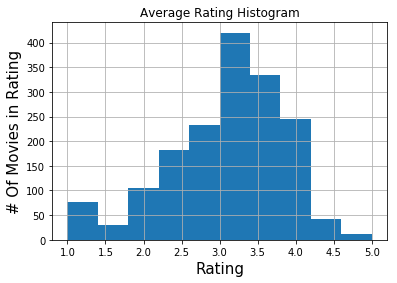

In [3]:
# get average rating for each movie and print histogram
average_rating=ratings.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating.sort_values('rating', inplace=True, ascending=False)
fig = average_rating.hist(column="rating")
plt.title("Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)

In [4]:
# print top 3 movies
average_rating.head(3)

,rating
movieid,
814,5.0
1599,5.0
1201,5.0


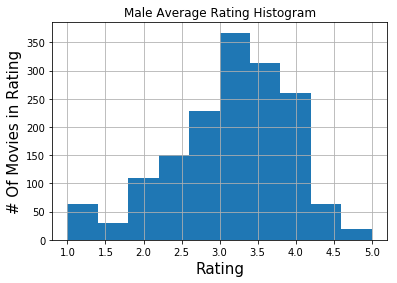

Top 3 movies by males:


,rating
movieid,
1500,5.0
1201,5.0
1605,5.0


In [5]:
# add column gender to ratings
USERS_DATA_FILE = "\\u.user"
users = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'age' , 'gender' , 'occupation' , 'zip code'])
merged_users_movies=pd.merge(ratings,users)

#Male Analysis
rating_male=merged_users_movies.loc[merged_users_movies['gender'] == 'M']
average_rating_male = rating_male.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_male.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_male.hist(column="rating")
plt.title("Male Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by males:")
average_rating_male.head(3)


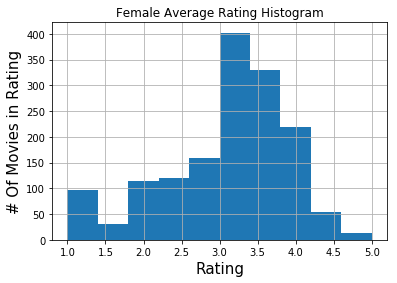

Top 3 movies by females:


,rating
movieid,
1368,5.0
1451,5.0
1594,5.0


In [6]:

#Female Analysis
rating_female=merged_users_movies.loc[merged_users_movies['gender'] == 'F']
average_rating_female = rating_female.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_female.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_female.hist(column="rating")
plt.title("Female Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by females:")
average_rating_female.head(3)

In [7]:
# get average difference between genders
average_rating_male.rename(columns = {'rating':'male_rating'}, inplace = True)
average_rating_female.rename(columns = {'rating':'female_rating'}, inplace = True)
merged_users_averages=pd.merge(average_rating_male,average_rating_female,left_index=True,right_index=True,how='outer')
# remove NAN
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['female_rating'])]
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['male_rating'])]
# get difference
difference_between_genders=merged_users_averages.apply(lambda row: (abs(row['male_rating']-row['female_rating'])), axis=1)
difference_between_genders_df = pd.DataFrame({'movieid':difference_between_genders.index, 'difference':difference_between_genders.values})
# get average difference between genders
print('Average of differences between male and female ratings: ')
print(difference_between_genders_df['difference'].mean())

# get top 5 movies with largest difference
    #sort ascending:
difference_between_genders_df.sort_values('difference', inplace=True, ascending=False)
    #print top 5
print('Top 5 movies with the greatest difference in ratings between genders: ')
difference_between_genders_df.head(5)

Average of differences between male and female ratings: 
0.508856945912609
Top 5 movies with the greatest difference in ratings between genders: 


,difference,movieid
1271,4.000000,1306
839,3.666667,851
1352,3.500000,1429
636,3.419355,641
1432,3.250000,1592


c - Genre Analysis

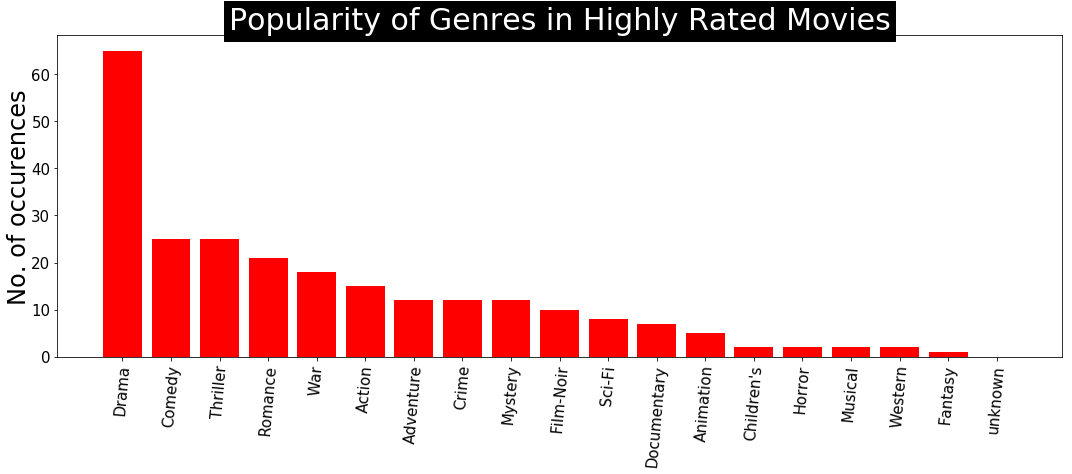

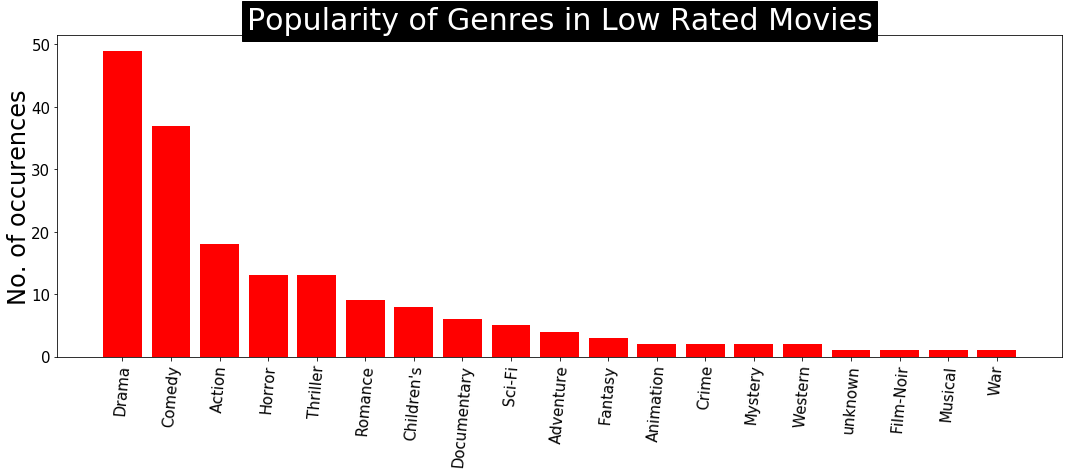

In [8]:
# add column gender to ratings
# read movie info with genre data
USERS_DATA_FILE = "\\u.item"
genre = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movieid', 'movie title', 'release date', 'video release date',
              'IMDb URL',  'unknown',  'Action',  'Adventure',  'Animation',
              'Children\'s', 'Comedy',  'Crime', 'Documentary', 'Drama',  'Fantasy', 'Film-Noir','Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'])

# merge movie info with movie ratings and user data and sort by rating
merged_average_rating_genre=pd.merge(average_rating,genre, left_index=True,right_on='movieid', how='outer')

# Analyze genre distribution for high rated movies (rating bigger than 4):
high_rated_indexes = merged_average_rating_genre['rating']>4.0
high_rated = merged_average_rating_genre[high_rated_indexes]

# Count high-rated movies per genre
genres = ['unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for g in genres:
    count = 0
    genre_movies = high_rated[g] == 1
    genres_count[g] = high_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Highly Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = merged_average_rating_genre['rating']<2.0
low_rated = merged_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


Genre Distribution Analysis for Demographic Details

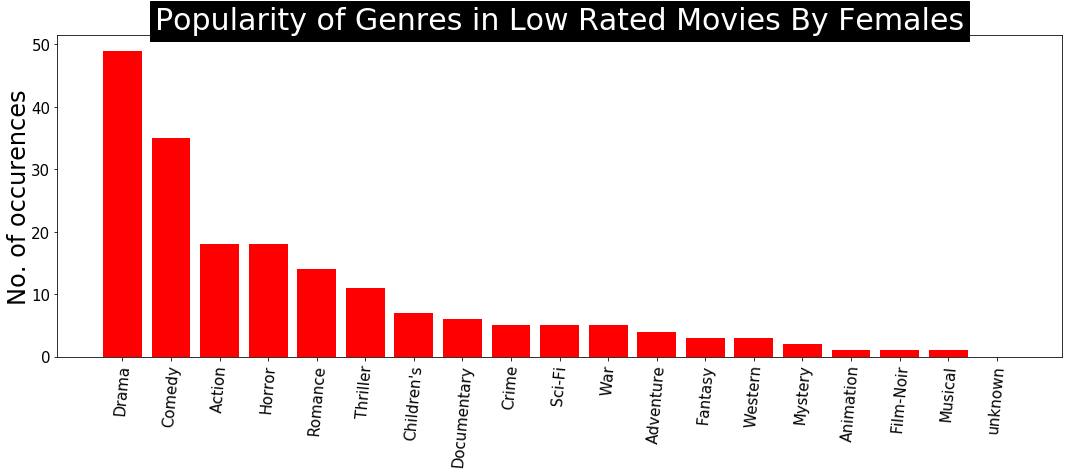

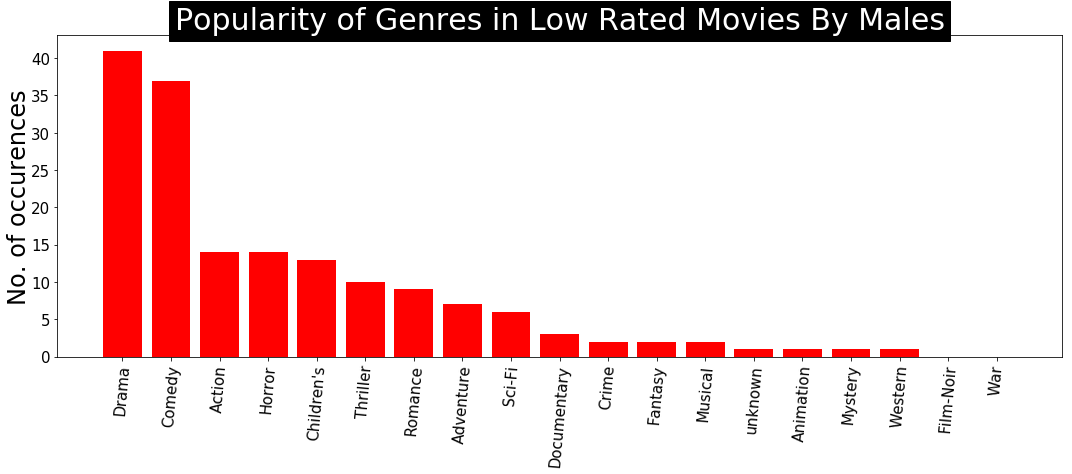

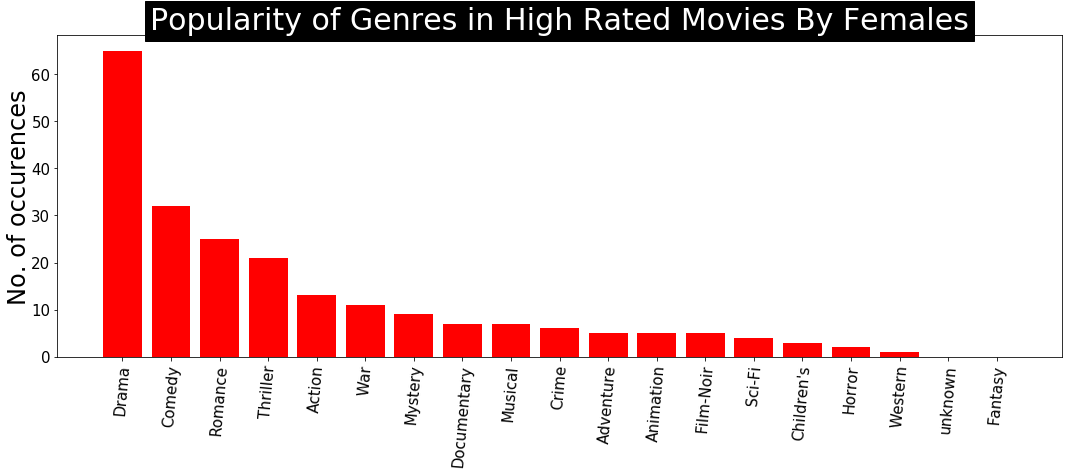

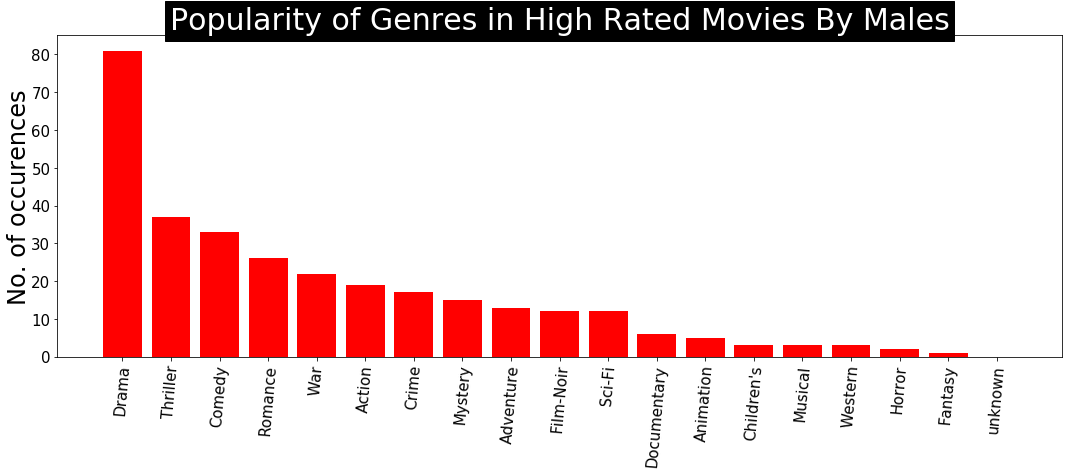

In [13]:
# Based on gender
#Female + Low Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = female_average_rating_genre['female_rating']<2.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + Low Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = male_average_rating_genre['male_rating']<2.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Female + High Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = female_average_rating_genre['female_rating']>4.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + High Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = male_average_rating_genre['male_rating']>4.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

d - Most popular movies.

We will find the movies that have the most ratings, and then out of those movies find the moives that have the highest avergae rating.

In [144]:
# Count ratings per movie
count_rating_per_movie = ratings['movieid'].value_counts()
count_rating_per_movie_df = pd.DataFrame({'movieid':count_rating_per_movie.index, 'frequency':count_rating_per_movie.values})

#Merge with average rating:
count_with_rating = pd.merge(average_rating, count_rating_per_movie_df, left_index=True, right_on='movieid', how='inner')

#Get average frequency
avg_freq = count_with_rating['frequency'].mean()

#Get movies with frequency over average frequency
high_freq_indexes = count_with_rating['frequency']>avg_freq
high_freq = count_with_rating[high_freq_indexes]

#Get movies with highest rating within movies with high rating frequency
high_freq.sort_values('rating', inplace=True, ascending=False)

#Get top 20
print('Top 20 most popular movies:')
high_freq.head(20)

Top 20 most popular movies:


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,rating,frequency,movieid
305,4.491071,112,408
34,4.466443,298,318
286,4.466102,118,169
74,4.456790,243,483
483,4.447761,67,114
46,4.445230,283,64
106,4.387560,209,603
55,4.385768,267,12
0,4.358491,583,50
263,4.344000,125,178


2 - Non-personal Recommendations



In [176]:
#Read training data
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score
RATING_TRAINING_FILE = "\\u1.base"
RATING_TEST_FILE = "\\u1.test"
ratings_training = pd.read_csv(MOVIELENS_DIR+RATING_TRAINING_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])
ratings_test = pd.read_csv(MOVIELENS_DIR+RATING_TEST_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

avg_ratings_training = ratings_training.filter(['movieid','rating']).groupby('movieid').mean()
training = pd.merge(avg_ratings_training, genre, left_index=True, right_on='movieid', how='left')
training_X = training[training.columns[6:]]
training_Y = (training.rating).values

#create and train the model
regr = linear_model.LinearRegression()
regr.fit(training_X, training_Y)

#Evaluate the model with test set
avg_ratings_test = ratings_test.filter(['movieid','rating']).groupby('movieid').mean()
test = pd.merge(avg_ratings_test, genre, left_index=True, right_on='movieid', how='left')
test_X = test[test.columns[6:]]
test_Y = (test.rating).values
test_pred = regr.predict(test_X)

# MAE
print('MAE: \n')
print(mean_absolute_error(test_Y, test_pred))

MAE: 

0.702680422372


In [ ]:
#TODO

3 - Personal Recommendations

In [179]:
import turicreate as tc
from datetime import datetime

#Prepare data - remove rare data
# rare_items = ratings_training.groupby('movieid', tc.aggre)

ModuleNotFoundError: No module named 'turicreate'